In [1]:
import numpy as np
import pandas as pd
from methods import GuptaPPCA
from methods import GrassPPCA
from methods import KernelPPCA
from methods import binPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Number of observations
n = 45
# Dimension
D = 3
# Modes
m = 2

# Functions of the model
def mu_true(par):
    return np.zeros((3,np.shape(par)[0]))

def P_true(par):
    p1_true = np.array([np.sin((7*np.pi/1080)*par+0.4), np.tan((7*np.pi/4860)*par-0.8), (49/1800)*par-1.1])
    p2_true = np.array([np.cos((7*np.pi/972)*par), np.cos((7*np.pi/576)*par-0.4), (7/600)*par+1.4])
    return p1_true,p2_true

def fixbins(bins, thetadata, m):
    diff = bins.reshape(-1,1)-thetadata.reshape(1,-1)
    ind = (diff<=0).sum(axis=0)-1
    counts = np.histogram(ind, np.arange(len(bins)))[0]
    jmin = counts.argmin()
    if(counts[jmin]<m):
        newbins = list(bins)
        del newbins[jmin]
        return fixbins(np.array(newbins), thetadata, m)
    else:
        return bins

In [3]:
def kernel_gauss(theta_new, theta_i, gamma=1/200):
    return np.exp(-gamma*((theta_new-theta_i)**2))

def kernel_laplace(theta_new, theta_i, gamma=1/200):
    return np.exp(-gamma*np.abs(theta_new-theta_i))

In [28]:
# den = np.linspace(1000,100,4)
den = np.array([2000,1000,500,250])
gamma_gauss = 1/den


In [16]:
den1 = np.linspace(50,5,4)
gamma_laplace = 1/den1

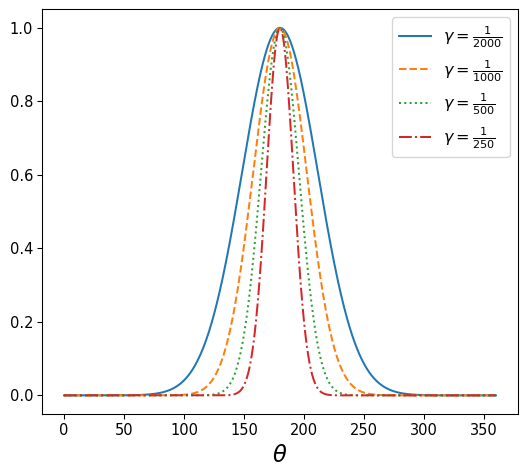

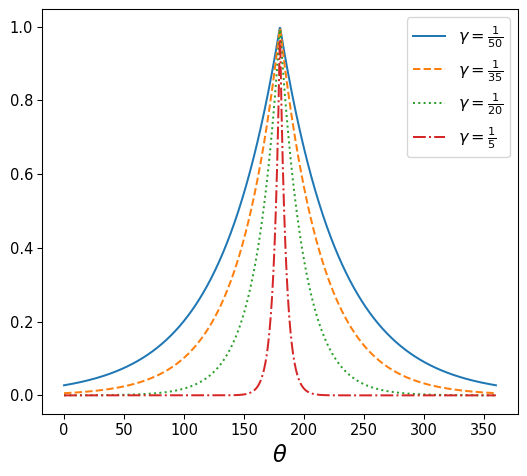

In [33]:
fontsize = 17
my_dpi=96
labels = ["BinPCA", "PPCA", "GrassPCA","KRBPCA"]
markers = ['*','x','o','^','.','s']
lines = ['-','--',':','-.']
palette = ['tab:orange','tab:blue','tab:green','tab:red','tab:purple','tab:brown']
plt.figure(figsize=(613/my_dpi, 525/my_dpi), dpi=my_dpi)
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
xval = np.linspace(0,360,1000)
for i in range(len(gamma_gauss)):
    plt.plot(xval,kernel_gauss(180,xval,gamma=gamma_gauss[i]),lines[i],label="$\\gamma = \\frac{1}{%d}$" %(den[i]))
plt.xlabel("$\\theta$",fontsize=fontsize)
plt.legend()
plt.savefig('../plots_final/GaussKer',dpi=my_dpi)
# plt.show()

plt.figure(figsize=(613/my_dpi, 525/my_dpi), dpi=my_dpi)
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
xval = np.linspace(0,360,1000)
for i in range(len(gamma_laplace)):
    plt.plot(xval,kernel_laplace(180,xval,gamma=gamma_laplace[i]),lines[i],label="$\\gamma = \\frac{1}{%d}$" %(den1[i]))
plt.xlabel("$\\theta$",fontsize=fontsize)
plt.legend()
plt.savefig('../plots_final/LaplaceKer',dpi=my_dpi)
# plt.show()